# **1. 데이터셋 불러오기**
데이터셋을 다운로드한 후에 데이터셋을 불러오고, 불러온 데이터프레임의 상단 5개의 데이터와 하단 5개의 데이터, 컬럼과 shape를 불러오는 코드를 작성해주세요.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishkumarak/netflix-reviews-playstore-daily-updated")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 12.8M/12.8M [00:01<00:00, 12.2MB/s]

Extracting files...


Path to dataset files: C:\Users\LG\.cache\kagglehub\datasets\ashishkumarak\netflix-reviews-playstore-daily-updated\versions\170


In [5]:
import pandas as pd

df = pd.read_csv("netflix_reviews.csv")  # 파일 불러오기

In [6]:
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,5f109900-7485-4333-8317-44251899fc83,Siddiqui Alkasim,Good 😊,5,0,8.137.0 build 4 50942,2024-10-26 13:41:01,8.137.0 build 4 50942
1,68174e16-f4a3-48f8-b0e7-f60840800d71,Binher Bilal,App acha hai lkin isne mere acc se khud paise ...,1,0,8.137.0 build 4 50942,2024-10-26 13:03:47,8.137.0 build 4 50942
2,b95c7685-cf4c-4a13-a8ce-798ec921fc84,Gabriella Guzman,Poop,5,0,8.137.0 build 4 50942,2024-10-26 13:01:15,8.137.0 build 4 50942
3,f3fb3677-8220-439e-8500-403b5378e04e,archie arreola,Poor,1,0,8.137.0 build 4 50942,2024-10-26 13:00:50,8.137.0 build 4 50942
4,45243bcb-120b-4dd4-acfa-9ae16197242e,Mzokhona Mthethwa,It is just the best app you could rely on,5,0,NaN,2024-10-26 12:57:57,NaN
...,...,...,...,...,...,...,...,...
117539,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117540,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117541,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117542,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


In [8]:
# 데이터셋의 상단 5개와 하단 5개 데이터 출력
print("상단 5개 데이터:")
print(df.head())  # 상단 5개 데이터

print("\n하단 5개 데이터:")
print(df.tail())  # 하단 5개 데이터

# 데이터셋의 shape과 컬럼 정보 출력
print(f"\nShape of the dataset: {df.shape}")
print(f"Columns in the dataset: {df.columns}")

상단 5개 데이터:
                               reviewId           userName  \
0  5f109900-7485-4333-8317-44251899fc83   Siddiqui Alkasim   
1  68174e16-f4a3-48f8-b0e7-f60840800d71       Binher Bilal   
2  b95c7685-cf4c-4a13-a8ce-798ec921fc84   Gabriella Guzman   
3  f3fb3677-8220-439e-8500-403b5378e04e     archie arreola   
4  45243bcb-120b-4dd4-acfa-9ae16197242e  Mzokhona Mthethwa   

                                             content  score  thumbsUpCount  \
0                                             Good 😊      5              0   
1  App acha hai lkin isne mere acc se khud paise ...      1              0   
2                                               Poop      5              0   
3                                               Poor      1              0   
4          It is just the best app you could rely on      5              0   

    reviewCreatedVersion                   at             appVersion  
0  8.137.0 build 4 50942  2024-10-26 13:41:01  8.137.0 build 4 50942  
1  8.

# **2. 데이터 전처리**
텍스트 데이터에는 불용어(쓸모없는 단어, 구두점 등)가 많습니다. 해당 부분을 없애주는 처리가 필요합니다. 텍스트 데이터에 대한 전처리를 해주세요.

In [7]:
# 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

# **3. feature 분석 (EDA)**
데이터를 잘 불러오셨다면 해당 데이터의 feature를 찾아야 합니다. 해당 넷플릭스의 데이터에는 리뷰가 1점부터 5점까지 있습니다. 해당 데이터의 분포를 그래프로 그려주세요. 

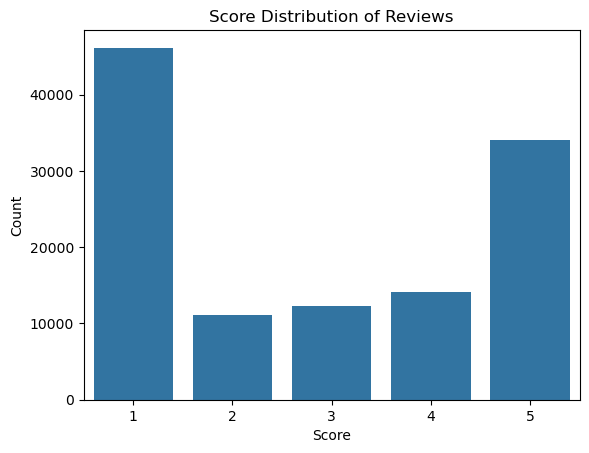

In [11]:
import pandas as pd
import seaborn as sns  # 그래프를 그리기 위한 seaborn 라이브러리 임포트
import matplotlib.pyplot as plt  # 그래프 표시를 위한 pyplot 임포트

# 각 점수별 리뷰 수 계산
리뷰갯수 = df['score'].value_counts().reset_index()
리뷰갯수.columns = ['리뷰컬럼', '리뷰갯수']  # 컬럼 이름 변경

# 바 차트 그리기
sns.barplot(x='리뷰컬럼', y='리뷰갯수', data=리뷰갯수)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score Distribution of Reviews')
plt.show()

# **4. 리뷰 예측 모델 학습시키기 (LSTM)**
이제 어떤 리뷰를 쓰면 점수가 어떻게 나올지에 대해서 예측을 해보고 싶습니다. 로지스틱 회귀 등을 사용하여, 리뷰에 대한 점수 예측을 진행해보세요

In [14]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 데이터셋 로드 (예: CSV 파일에서)
df = pd.read_csv("다운로드 받은 csv 파일.csv")  # 데이터셋 불러오기
reviews = df['content'].tolist()  # 리뷰 컬럼
ratings = df['score'].tolist()  # 점수 컬럼

# 데이터 분할
train_reviews, test_reviews, train_ratings, test_ratings = train_test_split(reviews, ratings, test_size=0.2, random_state=42)

# 텍스트 파이프라인 정의
tokenizer = get_tokenizer("basic_english")
text_pipeline = lambda x: [vocab[token] for token in tokenizer(x)]
label_encoder = LabelEncoder()
label_pipeline = lambda x: label_encoder.fit_transform([x])[0]

# 어휘 사전 구축
vocab = build_vocab_from_iterator(map(tokenizer, reviews), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

# 데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, text_pipeline, label_pipeline):
        self.reviews = reviews
        self.ratings = ratings
        self.text_pipeline = text_pipeline
        self.label_pipeline = label_pipeline

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = self.text_pipeline(self.reviews[idx])
        rating = self.label_pipeline(self.ratings[idx])
        return torch.tensor(review), torch.tensor(rating)

# 데이터셋 정의
train_dataset = ReviewDataset(train_reviews, train_ratings, text_pipeline, label_pipeline)
test_dataset = ReviewDataset(test_reviews, test_ratings, text_pipeline, label_pipeline)

# 데이터 로더 정의
BATCH_SIZE = 64
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.lstm(embedded.unsqueeze(0))
        return self.fc(hidden[-1])

# 하이퍼파라미터 정의
VOCAB_SIZE = len(vocab)
EMBED_DIM = 64
HIDDEN_DIM = 128
OUTPUT_DIM = len(set(ratings))  # 예측할 점수 개수

# 모델 초기화
model = LSTMModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 모델 학습
num_epochs = 10  # 에폭 수

for epoch in range(num_epochs):
    model.train()  # 학습 모드로 전환
    for reviews, ratings in train_dataloader:
        optimizer.zero_grad()  # 기울기 초기화
        output = model(reviews)  # 모델 예측
        loss = criterion(output, ratings)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 가중치 업데이트
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 예측 함수
def predict_review(model, review):
    model.eval()  # 평가 모드로 전환
    with torch.no_grad():
        tensor_review = torch.tensor(text_pipeline(review))
        output = model(tensor_review)
        prediction = output.argmax(1).item()  # 예측값 추출
        return label_encoder.inverse_transform([prediction])[0]

# 새로운 리뷰에 대한 예측
new_review = "This app is great but has some bugs."
predicted_score = predict_review(model, new_review)
print(f'Predicted Score: {predicted_score}')


C:\Users\LG\anaconda3\envs\ML\Lib\site-packages\torchtext\__init__.py:7: SyntaxWarning: invalid escape sequence '\ '
  "\n/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ \n"


OSError: [WinError 127] 지정된 프로시저를 찾을 수 없습니다